## Set Up Dependencies and Data


In [1]:
import joblib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm


In [2]:
slip_df = pd.read_csv("https://osf.io/s36qy/download")
baseline_df = pd.read_csv("https://osf.io/a48ch/download")


## Reproducibility


In [3]:
%load_ext watermark
%watermark -iwbmuvg -iv


Last updated: 2024-11-26T07:05:35.279147+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.29.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.5.0-1025-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

Git hash: 1664cace4722fbb1256dc64b8dff8dc7da6c6b26

Git branch: main

seaborn   : 0.13.2
joblib    : 1.3.2
numpy     : 2.1.3
pandas    : 2.2.3
matplotlib: 3.9.2

Watermark: 2.4.3



In [4]:
joblib.hash(slip_df)


'39d8ab52a50c2600e71ef223a19b8e48'

In [5]:
joblib.hash(baseline_df)


'ab0a545d0b16a029c2b44228f153819e'

# Preprocess data


In [6]:
slip_df["condition"] = "slip"
baseline_df["condition"] = "baseline"

df = pd.concat([slip_df, baseline_df])


In [7]:
df["Task Coding Sites"] = df["Task Coding Sites"].apply(eval)


In [8]:
df["Run ID"] = df["Unnamed: 0"].apply(lambda x: x.split(",")[0])
df["Task"] = df["Unnamed: 0"].apply(lambda x: x.split(",")[1])


In [9]:
tidy_df = df.explode("Task Coding Sites")
tidy_df


,Unnamed: 0,Task Coding Sites,Length,condition,Run ID,Task
0,"run_1593,NOT",16,161,slip,run_1593,NOT
0,"run_1593,NOT",50,161,slip,run_1593,NOT
0,"run_1593,NOT",52,161,slip,run_1593,NOT
0,"run_1593,NOT",56,161,slip,run_1593,NOT
0,"run_1593,NOT",60,161,slip,run_1593,NOT
...,...,...,...,...,...,...
267,"run_1554,NOR",86,100,baseline,run_1554,NOR
267,"run_1554,NOR",95,100,baseline,run_1554,NOR
267,"run_1554,NOR",99,100,baseline,run_1554,NOR
268,"run_1554,XOR",NaN,100,baseline,run_1554,XOR


### Draw Genome Maps


0it [00:00, ?it/s]

1it [00:02,  2.86s/it]

2it [00:05,  2.59s/it]

3it [00:06,  1.86s/it]

4it [00:07,  1.63s/it]

5it [00:08,  1.44s/it]

6it [00:09,  1.37s/it]

7it [00:11,  1.39s/it]

8it [00:12,  1.38s/it]

9it [00:14,  1.37s/it]

10it [00:15,  1.26s/it]

11it [00:16,  1.21s/it]

12it [00:17,  1.15s/it]

13it [00:18,  1.19s/it]

14it [00:19,  1.15s/it]

15it [00:20,  1.18s/it]

16it [00:21,  1.15s/it]

17it [00:22,  1.13s/it]

18it [00:23,  1.12s/it]

19it [00:25,  1.10s/it]

20it [00:26,  1.14s/it]

21it [00:27,  1.15s/it]

22it [00:28,  1.15s/it]

23it [00:30,  1.30s/it]

24it [00:31,  1.24s/it]

25it [00:32,  1.31s/it]

26it [00:34,  1.28s/it]

27it [00:35,  1.30s/it]

28it [00:36,  1.26s/it]

29it [00:37,  1.26s/it]

30it [00:39,  1.26s/it]

31it [00:40,  1.30s/it]

32it [00:41,  1.34s/it]

33it [00:43,  1.38s/it]

34it [00:44,  1.37s/it]

35it [00:46,  1.39s/it]

36it [00:47,  1.41s/it]

37it [00:49,  1.43s/it]

38it [00:50,  1.42s/it]

39it [00:51,  1.42s/it]

40it [00:53,  1.41s/it]

41it [00:54,  1.44s/it]

42it [00:56,  1.47s/it]

43it [00:57,  1.46s/it]

44it [00:59,  1.47s/it]

45it [01:00,  1.46s/it]

46it [01:02,  1.45s/it]

47it [01:03,  1.44s/it]

48it [01:05,  1.47s/it]

49it [01:06,  1.51s/it]

50it [01:08,  1.49s/it]

51it [01:09,  1.47s/it]

52it [01:11,  1.51s/it]

53it [01:13,  1.63s/it]

54it [01:14,  1.58s/it]

55it [01:16,  1.57s/it]

56it [01:17,  1.53s/it]

57it [01:19,  1.53s/it]

58it [01:20,  1.51s/it]

59it [01:22,  1.54s/it]

60it [01:23,  1.54s/it]

60it [01:23,  1.39s/it]

<Figure size 8000x4800 with 0 Axes>

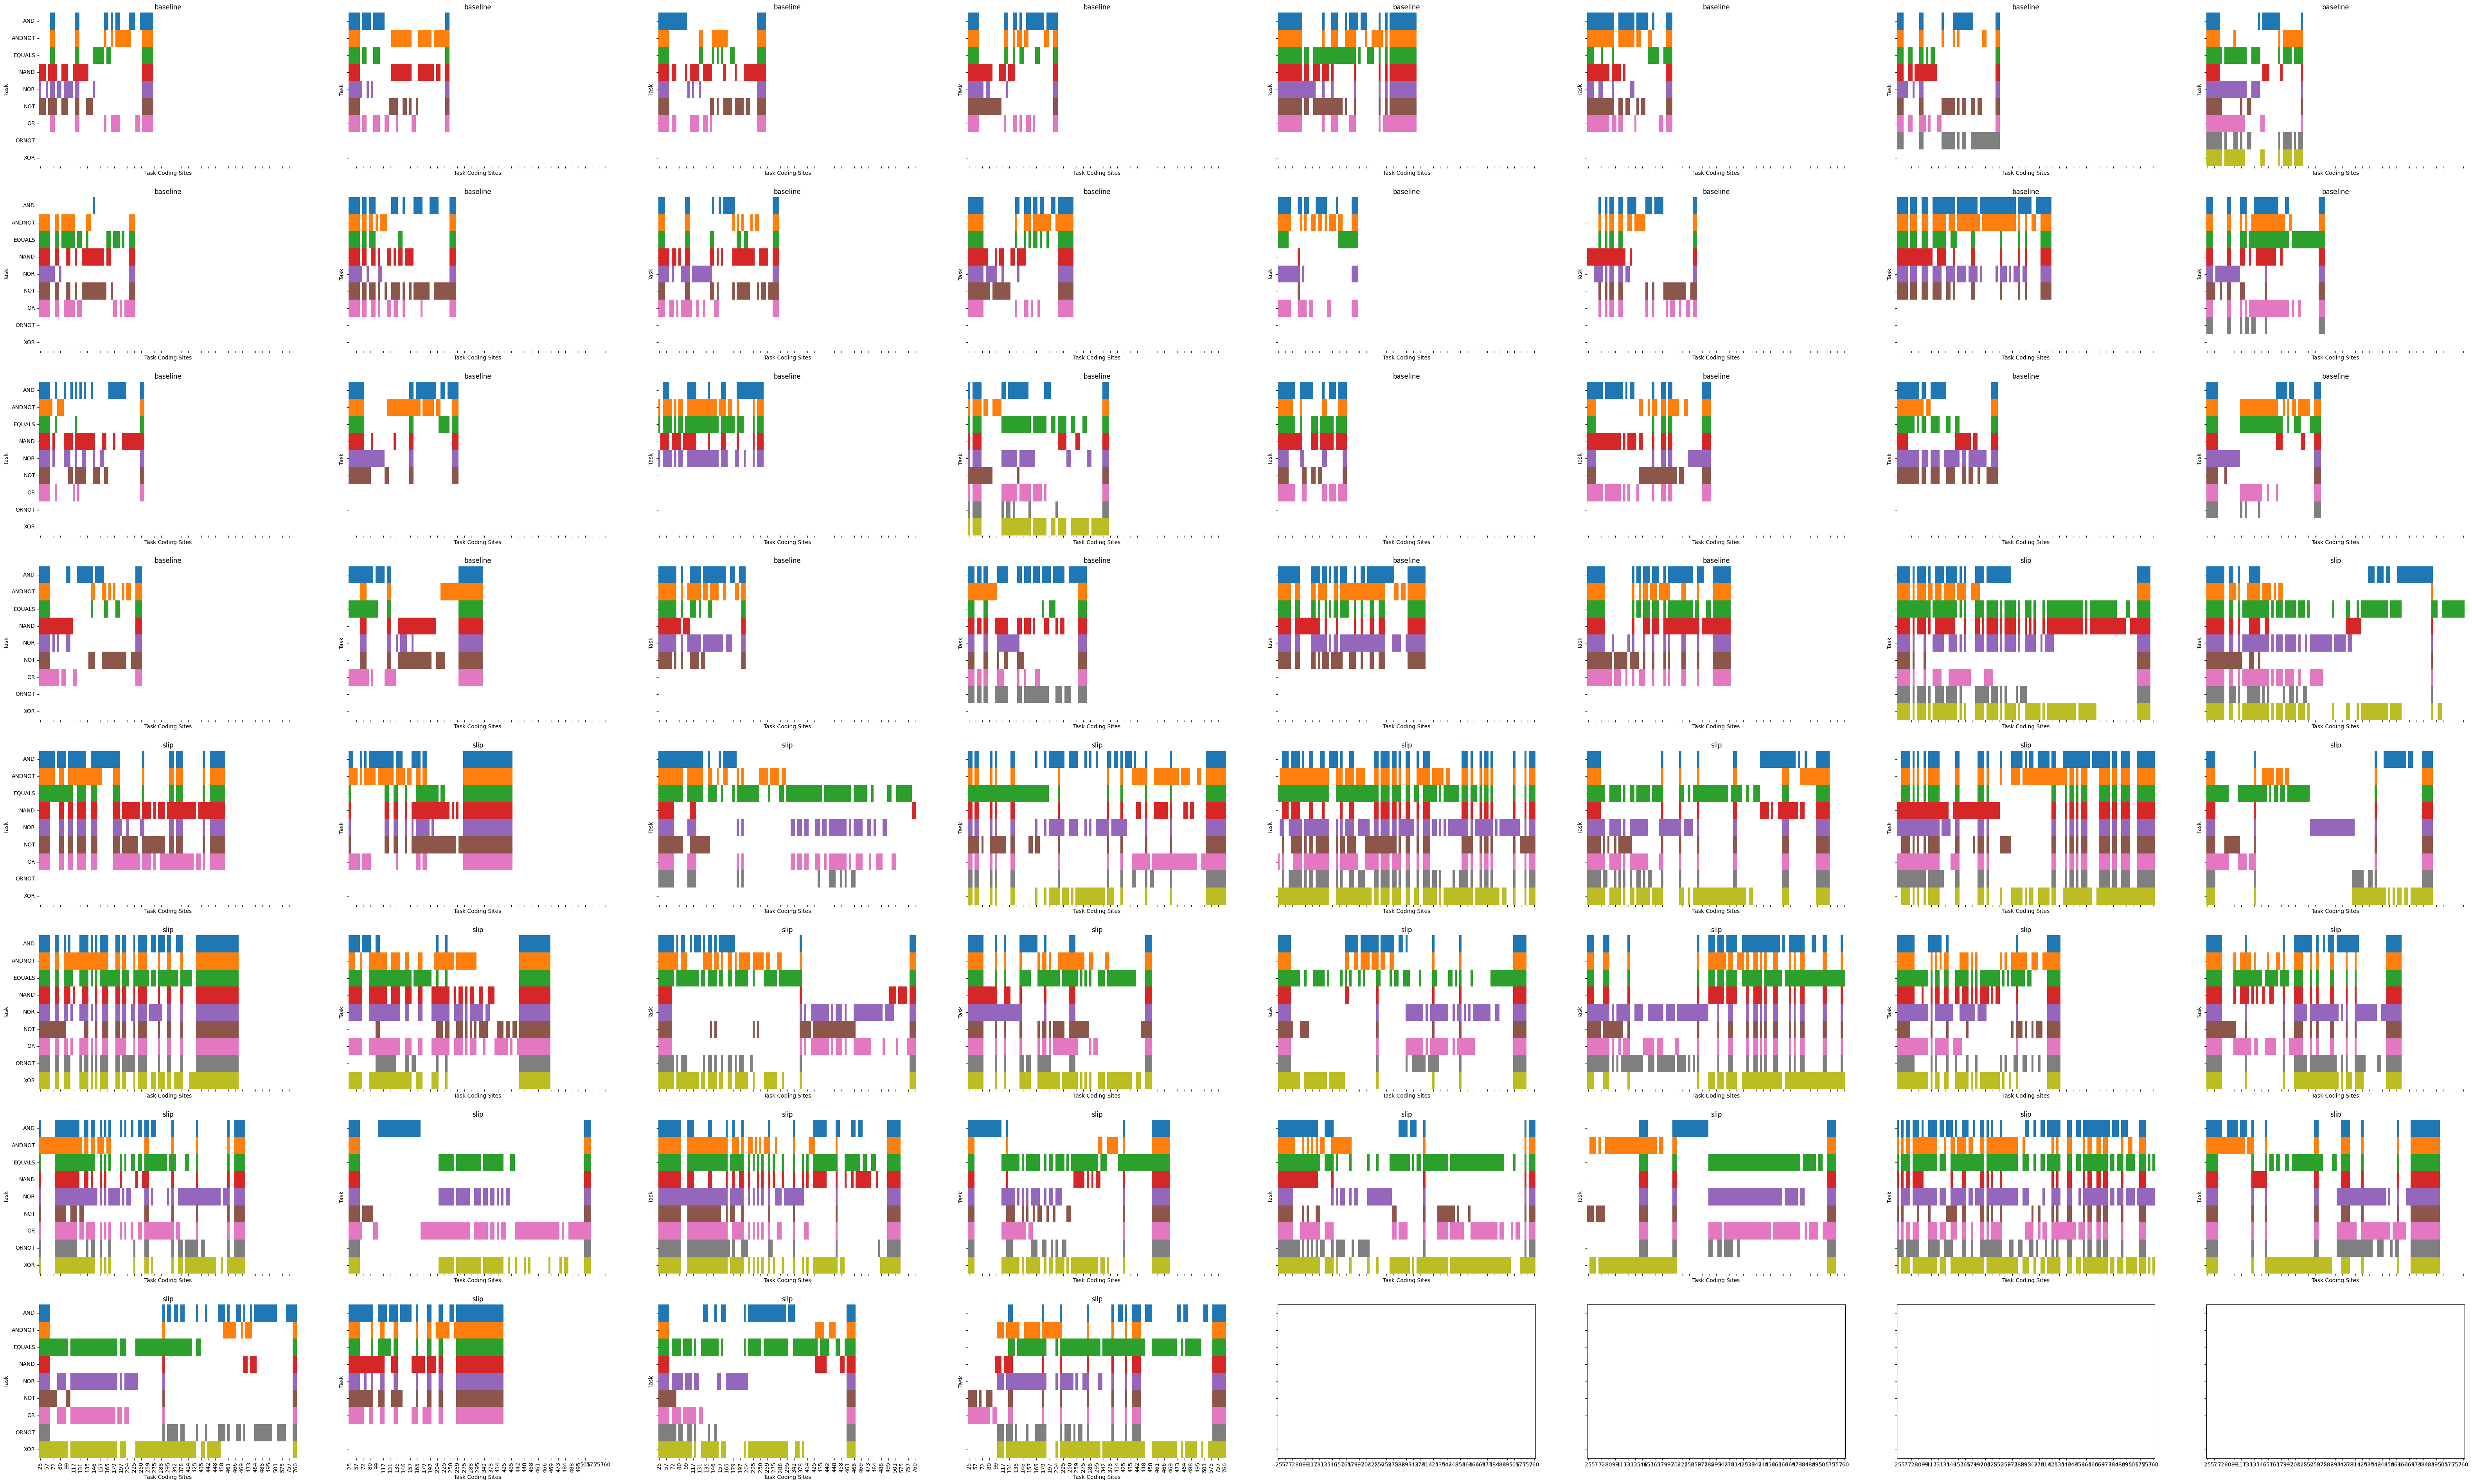

In [10]:
n_groups = len(tidy_df.groupby(["Run ID", "Length", "condition"]))
n_rows = int(np.ceil(np.sqrt(n_groups)))
n_cols = n_rows
plt.figure(figsize=(n_cols * 10, n_rows * 6))

for ax, (idx, group_df) in tqdm(
    zip(
        plt.subplots(
            n_rows,
            n_cols,
            sharex=True,
            sharey=True,
            squeeze=False,
            figsize=(n_cols * 10, n_rows * 6),
        )[1].ravel(),
        tidy_df.groupby(["Run ID", "Length", "condition"], sort=True),
    ),
):

    pivot_df = group_df.pivot_table(
        aggfunc="count",
        columns="Task Coding Sites",
        index="Task",
        values="Length",
    )
    for col in pivot_df.columns:
        vals = pivot_df[col].values
        pivot_df[col] = pivot_df[col] * np.array(range(len(vals)))

    for task in df["Task"].unique():
        if task not in pivot_df.index:
            pivot_df.loc[task] = np.nan

    df.sort_index(axis=1)

    sns.heatmap(
        pivot_df,
        ax=ax,
        cbar=False,
        cmap=sns.color_palette()[:10],
        vmin=0,
        vmax=10,
    )
    ax.set_title(idx[2])


plt.savefig("genome_layouts.png", dpi=500)
